In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



/kaggle/input/big-tech-giants-stock-price-data/big_tech_stock_prices.csv
/kaggle/input/big-tech-giants-stock-price-data/big_tech_companies.csv


In [1]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dfs = pd.read_csv("big_tech_companies.csv")


In [6]:
dfs.keys()

Index(['stock_symbol', 'company'], dtype='object')

In [7]:
df = dfs['big_tech_stock_prices']

KeyError: 'big_tech_stock_prices'

In [6]:
df.head()

,stock_symbol,date,open,high,low,close,adj_close,volume
0,AAPL,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
1,AAPL,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800
2,AAPL,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000
3,AAPL,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200
4,AAPL,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800


In [7]:
df.shape

(45088, 8)

In [8]:
df.columns

Index(['stock_symbol', 'date', 'open', 'high', 'low', 'close', 'adj_close',
       'volume'],
      dtype='object')

In [9]:
# Summary statistics
df.describe()

,open,high,low,close,adj_close,volume
count,45088.000000,45088.000000,45088.000000,45088.000000,45088.000000,4.508800e+04
mean,89.266584,90.369825,88.111930,89.271306,85.209631,5.297813e+07
std,101.626955,103.001073,100.124399,101.592916,100.995967,9.324730e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,5.892000e+05
25%,25.670000,25.930135,25.360001,25.660000,22.076433,9.629425e+06
50%,47.930000,48.459999,47.465000,47.970001,45.377333,2.646315e+07
75%,128.662502,129.848900,127.253945,128.640609,113.672460,5.839768e+07
max,696.280029,700.989990,686.090027,691.690002,691.690002,1.880998e+09


In [10]:
# Check for missing values
print(df.isnull().sum())

stock_symbol    0
date            0
open            0
high            0
low             0
close           0
adj_close       0
volume          0
dtype: int64


In [11]:
# Convert 'date' column to datetime format
pd.to_datetime(df['date']).dtypes
df['date'] = pd.to_datetime(df['date'])

In [12]:
# Compute autocorrelation for each column
autocorr_results = {}
columns_of_interest = ['open', 'high', 'low', 'close', 'adj_close', 'volume']

for col in columns_of_interest:
    autocorr_results[col] = df[col].autocorr()

# Display autocorrelation results
print("Autocorrelation Results:")
for col, autocorr_val in autocorr_results.items():
    print(f"{col}: {autocorr_val}")

Autocorrelation Results:
open: 0.9991543299963446
high: 0.9992620739816165
low: 0.9992206241133936
close: 0.9991219717979183
adj_close: 0.9991139187648087
volume: 0.9091373789671849


In [13]:
df['stock_symbol'].unique()

array(['AAPL', 'ADBE', 'AMZN', 'CRM', 'CSCO', 'GOOGL', 'IBM', 'INTC',
       'META', 'MSFT', 'NFLX', 'NVDA', 'ORCL', 'TSLA'], dtype=object)

In [14]:
# Create line plot using Plotly Express
fig = px.line(df[df['stock_symbol'] == 'AAPL'], x='date', y='close', title=f'Stock Symbol: AAPL Closing Price Over Time')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Closing Price')
fig.show()

In [15]:
# Create line plot using Plotly Express
fig = px.line(df[df['stock_symbol'] == 'ADBE'], x='date', y='close', title=f'Stock Symbol: ADBE Closing Price Over Time')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Closing Price')
fig.show()

In [16]:
from statsmodels.tsa.stattools import adfuller

ADF_result = adfuller(df['close'])

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -4.303936276815726
p-value: 0.000437291708536878


In [17]:
# Import necessary libraries
import plotly.express as px
from plotly.subplots import make_subplots

# Get unique stock symbols
unique_symbols = df['stock_symbol'].unique()

# Create subplots with Plotly Express
fig = make_subplots(rows=len(unique_symbols), cols=1, subplot_titles=unique_symbols,
                    shared_xaxes=True, vertical_spacing=0.05)  # Adjust vertical_spacing here

# Iterate over each symbol and add traces to subplots
for i, symbol in enumerate(unique_symbols, start=1):
    # Filter data for the current symbol
    symbol_data = df[df['stock_symbol'] == symbol]
    
    # Add trace for the current symbol to the subplot
    fig.add_trace(px.line(symbol_data, x='date', y='close').data[0], row=i, col=1)

# Update subplot layout
fig.update_layout(title='Closing Price Over Time for Each Stock Symbol', showlegend=False)
fig.update_xaxes(title_text='Date', row=len(unique_symbols), col=1)
fig.update_yaxes(title_text='Closing Price', col=1)

# Show the plot
fig.show()

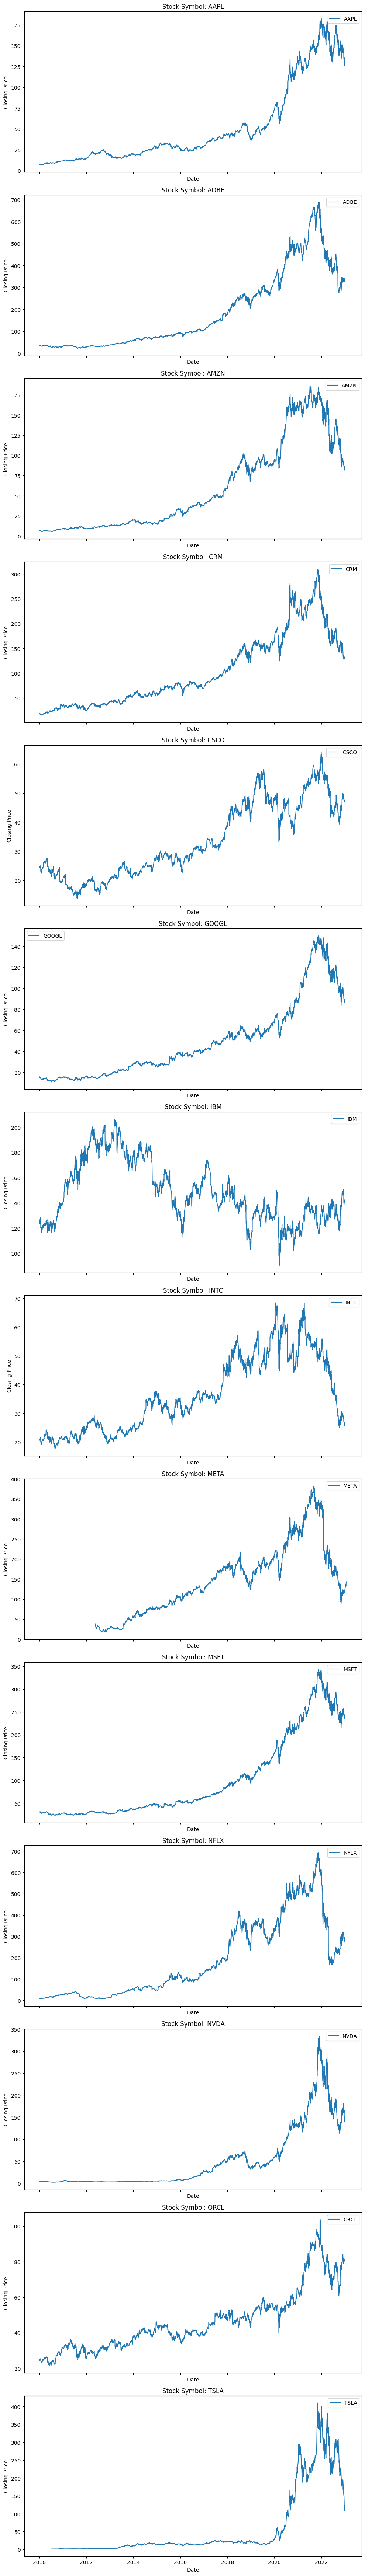

In [18]:
# Get unique stock symbols
unique_symbols = df['stock_symbol'].unique()

# Define the number of rows and columns based on unique symbols
num_rows = len(unique_symbols)
num_cols = 1

# Create figure and axes using plt.subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5*num_rows), sharex=True)

# Iterate over each symbol and plot on respective subplot
for i, symbol in enumerate(unique_symbols):
    # Filter data for the current symbol
    symbol_data = df[df['stock_symbol'] == symbol]
    
    # Select the subplot for the current symbol
    ax = axes[i] if num_rows > 1 else axes
    
    # Plot the closing price over time
    ax.plot(symbol_data['date'], symbol_data['close'], label=symbol)
    ax.set_title(f'Stock Symbol: {symbol}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Closing Price')
    ax.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()